In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

tf.test.gpu_device_name()


'/device:GPU:0'

In [5]:
train = ImageDataGenerator(rescale=1/255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("./n-cars_train/", target_size=(224, 224), batch_size=32, class_mode="binary")
test_dataset = test.flow_from_directory("./n-cars_test/", target_size=(224, 224), batch_size=32, class_mode="binary")

Found 27321 images belonging to 2 classes.
Found 4177 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'cars': 0, 'nocar': 1}

In [7]:


model = keras.Sequential()


model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Flatten())

 
model.add(keras.layers.Dense(512,activation='relu'))


model.add(keras.layers.Dense(1,activation='sigmoid'))



In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [9]:

car = model.fit(train_dataset,
         epochs = 25,
         validation_data = test_dataset,
         )

ERROR! Session/line number was not unique in database. History logging moved to new session 28
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 854 steps, validate for 131 steps
Epoch 1/25
854/854 [==============================] - 346s 406ms/step - loss: 0.1736 - accuracy: 0.9327 - val_loss: 0.2206 - val_accuracy: 0.9196
Epoch 2/25
854/854 [==============================] - 301s 353ms/step - loss: 0.1513 - accuracy: 0.9407 - val_loss: 0.0780 - val_accuracy: 0.9696
Epoch 3/25
854/854 [==============================] - 304s 356ms/step - loss: 0.1295 - accuracy: 0.9500 - val_loss: 0.3956 - val_accuracy: 0.8810
Epoch 4/25
854/854 [==============================] - 293s 343ms/step - loss: 0.1124 - accuracy: 0.9569 - val_loss: 0.0795 - val_accuracy: 0.9674
Epoch 5/25
854/854 [==============================] - 286s 335ms/step - loss: 0.1055 - accuracy: 0.9600 - val_loss: 0.0608 - val_accuracy: 0.9792
Epoch 6/25
854/854 [==============================] - 285s 334ms/step - loss: 0.0981 - accuracy: 0.9631 - val_loss: 0.1347 - val_accuracy: 0.9583
Epoch 7/25
854/854 [==============================] - 295s 345ms/step - loss: 0.

In [10]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    print(val)
    print(val)
    if val == 0:
        
        plt.xlabel("CAR",fontsize=30)
        
    
    elif val == 1:
        
        plt.xlabel("NO CAR",fontsize=30)
        
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

[[1.]]
[[1.]]


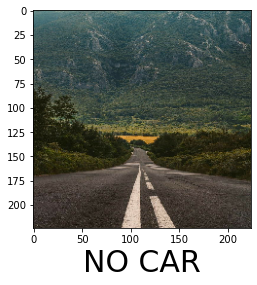

In [11]:
    predictImage(r"C:/Users/mehta/Downloads/WhatsApp Image 2021-10-12 at 14.45.59.jpeg")

[[0.]]
[[0.]]


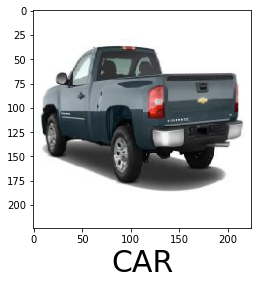

In [12]:
predictImage(r"C:/Users/mehta/carscanProj/n-cars_test/cars/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_kCa.jpg")

In [13]:
model.save("./car-detector.h5")